<a href="https://colab.research.google.com/github/ketango12/Campaign-Performance-Analysis/blob/main/camp_perf_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Dataset

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/manishabhatt22/marketing-campaign-performance-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ketangoyal1206
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/manishabhatt22/marketing-campaign-performance-dataset


Load the Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install pandas openpyxl

from warnings import filterwarnings

filterwarnings("ignore")
%matplotlib inline


df = pd.read_csv("/content/marketing-campaign-performance-dataset/marketing_campaign_dataset.csv")

**Descriptive Analysis**

a) Basic Structure:
Get overview of the dataset using df.head()

In [5]:
df.head(5)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [6]:
row, col = df.shape
print(f"{'Number of rows':<20}: {row}\n{'Number of columns':<20}: {col:<20}")

Number of rows      : 200000
Number of columns   : 16                  


Concise summary using info() function of the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

Checking if the dataset contains any null values.

In [8]:
df.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


Standardized column names by converting to lowercase and replacing spaces with underscores for easier referencing and consistency in data manipulation.

In [9]:
## Converting evrything into lower case in order to avoid any error.

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

Coverting "acquisition_cost" to **float** data type:

In [10]:
# Remove dollar sign and commas from 'Acquisition_Cost' column and convert it to float
df['acquisition_cost'] = df['acquisition_cost'].str.replace('$', '').str.replace(',', '').astype(float)

Changing data-types of some columns:

In [11]:
# Convert 'company_type' column to categorical
df['company'] = df['company'].astype('category')

# Convert 'campaign_type' column to categorical
df['campaign_type'] = df['campaign_type'].astype('category')

# Convert 'target_audience' column to categorical
df['target_audience'] = df['target_audience'].astype('category')

# Convert 'channel_used' column to categorical
df['channel_used'] = df['channel_used'].astype('category')

# Convert 'language' column to categorical
df['language'] = df['language'].astype('category')

# Convert 'customer_segment' column to categorical
df['customer_segment'] = df['customer_segment'].astype('category')

In [12]:
df.head(5)

,campaign_id,company,campaign_type,target_audience,duration,channel_used,conversion_rate,acquisition_cost,roi,location,language,clicks,impressions,engagement_score,customer_segment,date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   campaign_id       200000 non-null  int64   
 1   company           200000 non-null  category
 2   campaign_type     200000 non-null  category
 3   target_audience   200000 non-null  category
 4   duration          200000 non-null  object  
 5   channel_used      200000 non-null  category
 6   conversion_rate   200000 non-null  float64 
 7   acquisition_cost  200000 non-null  float64 
 8   roi               200000 non-null  float64 
 9   location          200000 non-null  object  
 10  language          200000 non-null  category
 11  clicks            200000 non-null  int64   
 12  impressions       200000 non-null  int64   
 13  engagement_score  200000 non-null  int64   
 14  customer_segment  200000 non-null  category
 15  date              200000 non-null  object  
dtypes:

In [14]:
# Convert 'Duration' column to numeric by extracting the number of days

df['duration'] = df['duration'].str.extract('(\d+)').astype(int)

In [15]:
# Convert 'Date' column to datetime format

df['date'] = pd.to_datetime(df['date'])

b) Data exploration :

In [16]:
df.describe().round(2)

,campaign_id,duration,conversion_rate,acquisition_cost,roi,clicks,impressions,engagement_score,date
count,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000
mean,100000.50,37.50,0.08,12504.39,5.00,549.77,5507.30,5.49,2021-07-01 23:35:09.600000
min,1.00,15.00,0.01,5000.00,2.00,100.00,1000.00,1.00,2021-01-01 00:00:00
25%,50000.75,30.00,0.05,8739.75,3.50,325.00,3266.00,3.00,2021-04-02 00:00:00
50%,100000.50,30.00,0.08,12496.50,5.01,550.00,5517.50,5.00,2021-07-02 00:00:00
75%,150000.25,45.00,0.12,16264.00,6.51,775.00,7753.00,8.00,2021-10-01 00:00:00
max,200000.00,60.00,0.15,20000.00,8.00,1000.00,10000.00,10.00,2021-12-31 00:00:00
std,57735.17,16.75,0.04,4337.66,1.73,260.02,2596.86,2.87,NaN


In [17]:
# Unique values of 'company_type'

company_types = df['company'].unique()
print("unique_campaign_types:", company_types)

unique_campaign_types: ['Innovate Industries', 'NexGen Systems', 'Alpha Innovations', 'DataTech Solutions', 'TechCorp']
Categories (5, object): ['Alpha Innovations', 'DataTech Solutions', 'Innovate Industries',
                         'NexGen Systems', 'TechCorp']


In [18]:
# Unique values of 'campaign_type'

campaign_types = df['campaign_type'].unique()
print("unique_campaign_types:", campaign_types)

unique_campaign_types: ['Email', 'Influencer', 'Display', 'Search', 'Social Media']
Categories (5, object): ['Display', 'Email', 'Influencer', 'Search', 'Social Media']


In [20]:
# Unique values of 'target_audience'

target_audiences = df['target_audience'].unique()
print("unique_target_audiences:", target_audiences)

unique_target_audiences: ['Men 18-24', 'Women 35-44', 'Men 25-34', 'All Ages', 'Women 25-34']
Categories (5, object): ['All Ages', 'Men 18-24', 'Men 25-34', 'Women 25-34', 'Women 35-44']


In [21]:
# Unique values of 'channel_used'

channels_used = df['channel_used'].unique()
print("unique_channels_used:", channels_used)

unique_channels_used: ['Google Ads', 'YouTube', 'Instagram', 'Website', 'Facebook', 'Email']
Categories (6, object): ['Email', 'Facebook', 'Google Ads', 'Instagram', 'Website', 'YouTube']


In [22]:
# Unique values of 'language'

languages = df['language'].unique()
print("unique_languages:", languages)

unique_languages: ['Spanish', 'German', 'French', 'Mandarin', 'English']
Categories (5, object): ['English', 'French', 'German', 'Mandarin', 'Spanish']


In [23]:
# Unique values of 'customer_segment'

customer_segments = df['customer_segment'].unique()
print("unique_customer_segments:", customer_segments)

unique_customer_segments: ['Health & Wellness', 'Fashionistas', 'Outdoor Adventurers', 'Foodies', 'Tech Enthusiasts']
Categories (5, object): ['Fashionistas', 'Foodies', 'Health & Wellness', 'Outdoor Adventurers',
                         'Tech Enthusiasts']


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   campaign_id       200000 non-null  int64         
 1   company           200000 non-null  category      
 2   campaign_type     200000 non-null  category      
 3   target_audience   200000 non-null  category      
 4   duration          200000 non-null  int64         
 5   channel_used      200000 non-null  category      
 6   conversion_rate   200000 non-null  float64       
 7   acquisition_cost  200000 non-null  float64       
 8   roi               200000 non-null  float64       
 9   location          200000 non-null  object        
 10  language          200000 non-null  category      
 11  clicks            200000 non-null  int64         
 12  impressions       200000 non-null  int64         
 13  engagement_score  200000 non-null  int64         
 14  cust

Occurrences of each category in the "Campaign_Type" and "Channel_Used" columns. This shows that there is no significant difference in count of each values. The data is evenly distributed.

In [25]:
df.campaign_type.value_counts()

,count
campaign_type,
Influencer,40169
Search,40157
Display,39987
Email,39870
Social Media,39817


In [26]:
df.channel_used.value_counts()

,count
channel_used,
Email,33599
Google Ads,33438
YouTube,33392
Instagram,33392
Website,33360
Facebook,32819


**Exploratory Data Analysis (EDA) and Visualization**

Campaign Performance :

In [27]:
df.head(5)

,campaign_id,company,campaign_type,target_audience,duration,channel_used,conversion_rate,acquisition_cost,roi,location,language,clicks,impressions,engagement_score,customer_segment,date
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


**Average Coversion Rate across Channel Used and Campaign Type**

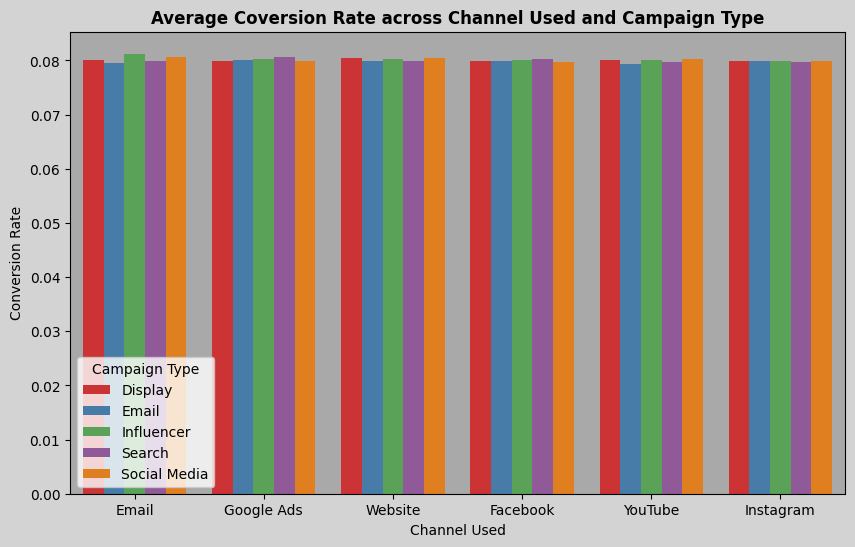

In [28]:
order_CR = df.groupby('channel_used')['conversion_rate'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.barplot(x='channel_used', y='conversion_rate', hue='campaign_type', data=df, order=order_CR, palette='Set1', errorbar=None)

plt.gca().set_facecolor('darkgrey')

plt.title('Average Coversion Rate across Channel Used and Campaign Type', fontweight='bold')
plt.xlabel('Channel Used')
plt.ylabel('Conversion Rate')
plt.legend(title='Campaign Type', loc='lower left')

plt.show()


*   The bar plot suggests that the marketing efforts are generally successful across all channels and campaign types, with only minor variations in performance.
*   Influencer campaigns (blue bars) tend to have slightly higher conversion rates across most channels, particularly on Facebook and websites. This indicates that influencer marketing can be a particularl effective strategy.
*   Interestingly, email campaigns have the highest conversion rate on Instagram, suggesting a potential synergy between email and Instagram marketing.
*   Social Media Campaign Type has slightly lower conversion rates on Facebook and Instagram, which is somewhat unexpected given these are social platforms.
*   Display ads (purple bars) show consistent performance across channels, with a slight edge on Facebook.
*   Search campaigns (orange bars) perform relatively well across all channels.

**Average Return of Investment by Company**

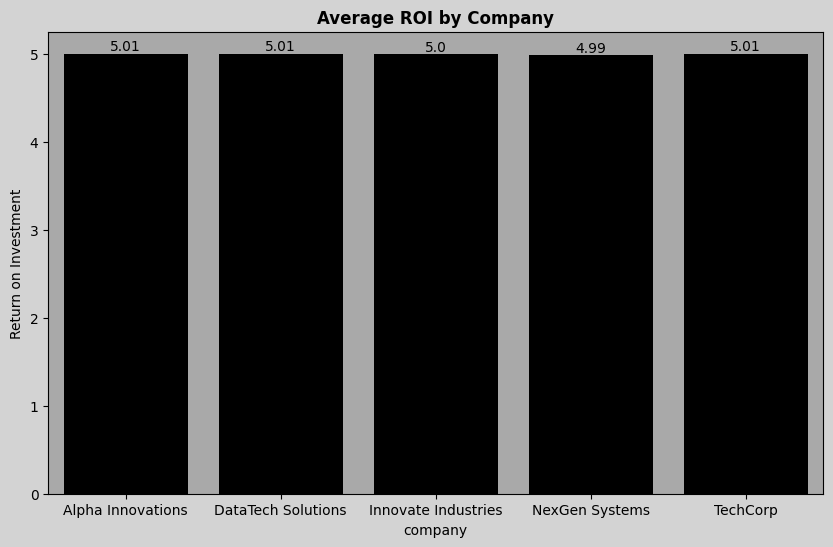

In [29]:
order_roi = df.groupby("company")[["roi"]].mean().reset_index()

plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.barplot(x='company', y='roi', data=df, color='black', errorbar=None)

plt.gca().set_facecolor('darkgrey')

plt.title('Average ROI by Company', fontweight='bold')
plt.ylabel('Return on Investment')

for i, v in enumerate(order_roi['roi']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

All most all the companies in the dataset have uniform average ROI, indicating equal performance and competition. But, "TechCorp", "Alpha Innovations" and "NextGen Systems" has a bit taller bar which shows they are the forerunners in the dataset in terms of efficiency.

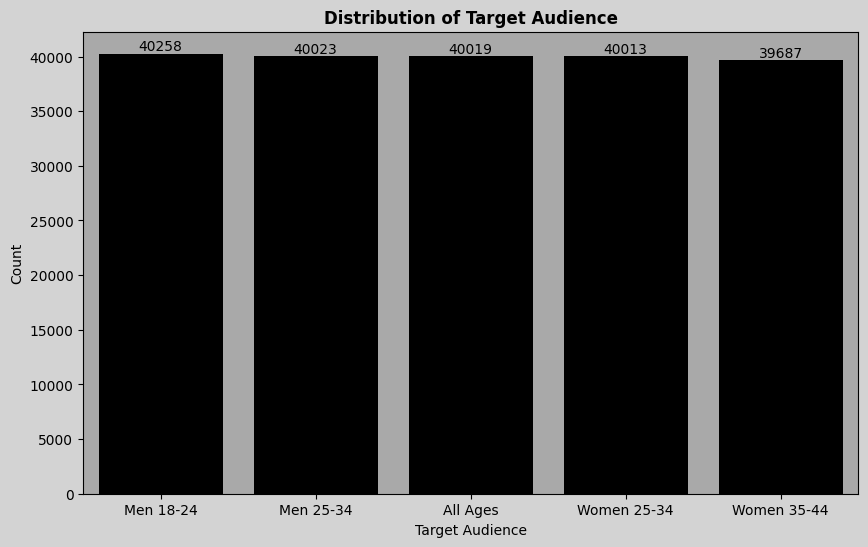

In [30]:
plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.countplot(x='target_audience', data=df, color='black', order=df.target_audience.value_counts().index)

plt.gca().set_facecolor('darkgrey')

plt.title('Distribution of Target Audience', fontweight='bold')
plt.xlabel('Target Audience')
plt.ylabel('Count')

for i, v in enumerate(df.target_audience.value_counts()):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

All audiences shows equal potential among the customer segment, but looking at the graph we can clearly say that Men audience segment had a greater combined count from that of women.

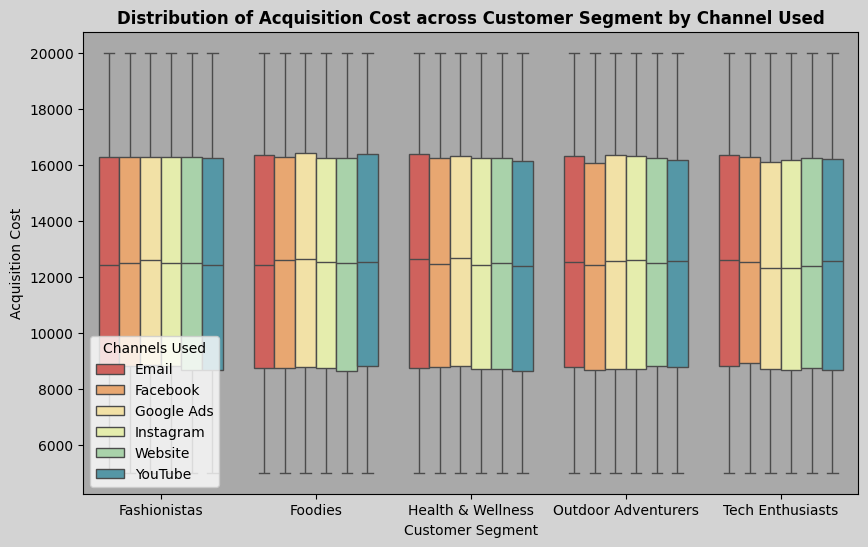

In [31]:
plt.figure(figsize=(10, 6), facecolor='lightgrey')

sns.boxplot(y='acquisition_cost', x='customer_segment', hue='channel_used', data=df, palette='Spectral')

plt.gca().set_facecolor('darkgrey')

plt.title('Distribution of Acquisition Cost across Customer Segment by Channel Used', fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Acquisition Cost')
plt.legend(title='Channels Used', loc='lower left')

plt.show()



*   Facebook and Google Ads show fairly consistent acquisition costs across all segments.
*   Google Ads has a relatively high acquisition cost for Fashionistas, Health & Wellness and Foodies. This suggests that Instagram is more expensive for this customer segment.
*   The Fashionistas & Foodies segment shows less spread across most channels. This indicates that acquisition costs in this segment are more consistent.





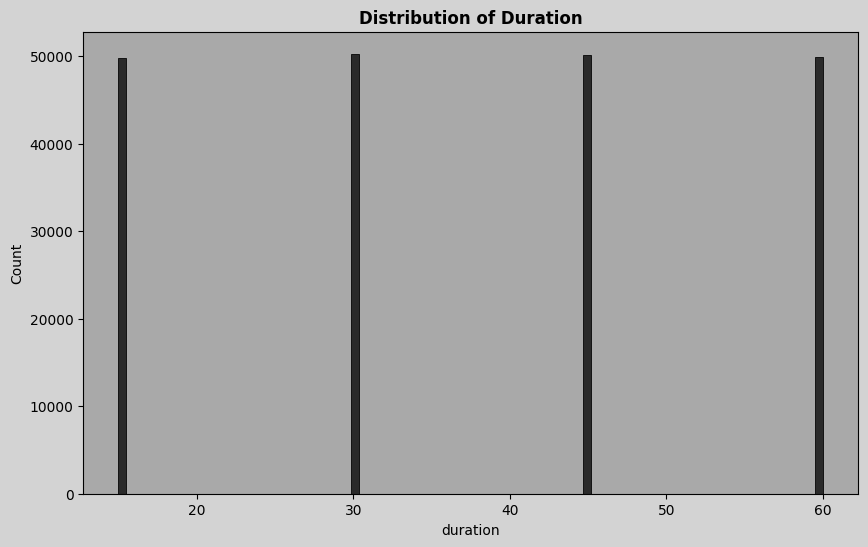

In [32]:
plt.figure(figsize=(10, 6), facecolor='lightgrey')

sorted_data = df.sort_values(by='duration')

sns.histplot(sorted_data['duration'], color='black')

plt.gca().set_facecolor('darkgrey')

plt.title('Distribution of Duration', fontweight='bold')

plt.show()

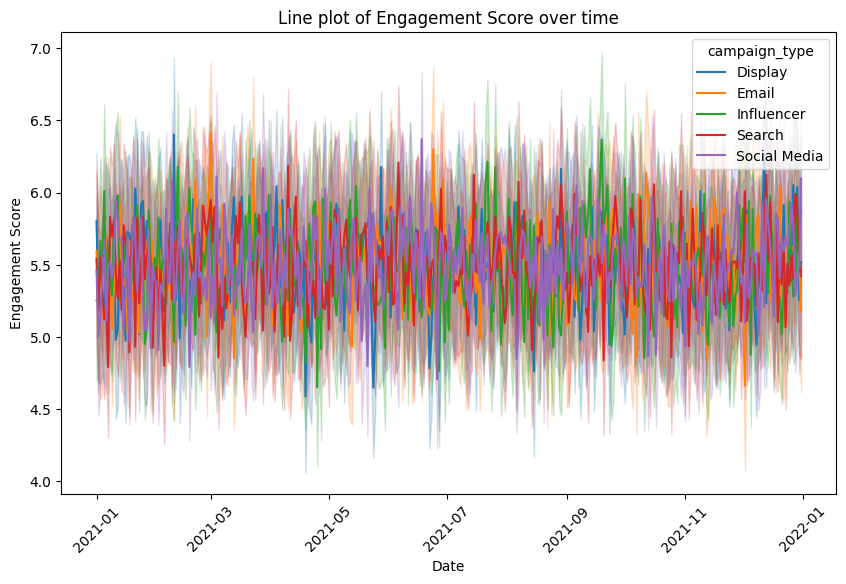

In [33]:
# Line plot of Engagement Score over time

df['date'] = pd.to_datetime(df['date'])
df_sorted = df.sort_values('date')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x='date', y='engagement_score', hue='campaign_type')
plt.title('Line plot of Engagement Score over time')
plt.xlabel('Date')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)
plt.show()

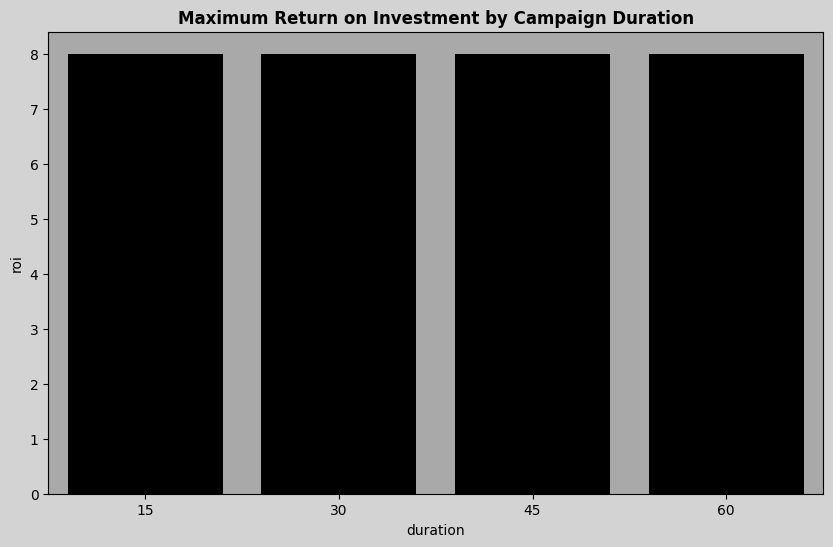

In [34]:
plt.figure(figsize=(10, 6), facecolor='lightgrey')

order_D_ROI = df.duration.sort_values()

sns.barplot(x='duration', y='roi', data=df, estimator='max', order=order_D_ROI, errorbar=None, color='blacK')

plt.gca().set_facecolor('darkgrey')

plt.title('Maximum Return on Investment by Campaign Duration', fontweight='bold')

plt.show()

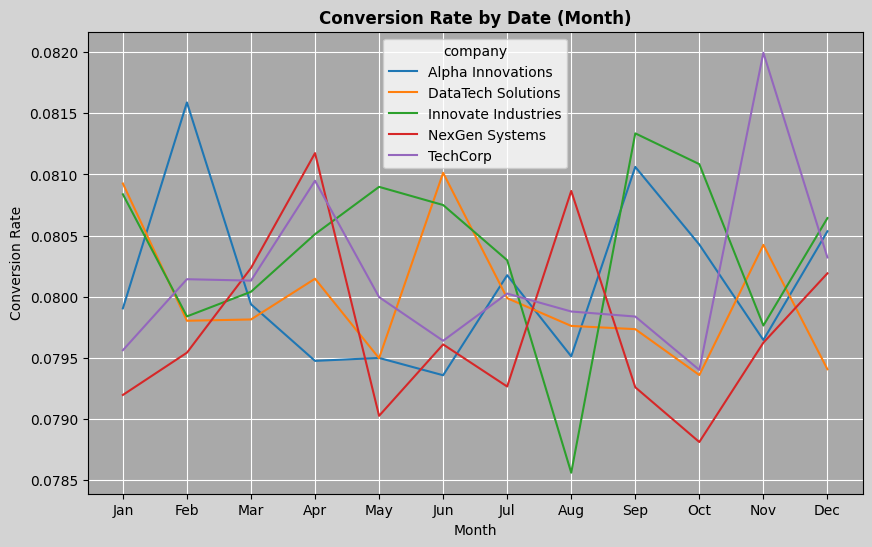

In [35]:
import calendar

df.Date = pd.to_datetime(df['date'], format='%d-%m-%Y')

monthly_df = df.groupby([df['company'], df['date'].dt.strftime('%b')]).agg({'conversion_rate' : 'mean'}).reset_index()

monthly_df['date'] = pd.Categorical(monthly_df['date'], categories=list(calendar.month_abbr), ordered=True)

plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.lineplot(x='date', y='conversion_rate', hue='company', data=monthly_df, errorbar=None)

plt.gca().set_facecolor('darkgrey')

plt.title('Conversion Rate by Date (Month)', fontweight='bold')
plt.ylabel('Conversion Rate')
plt.xlabel('Month')
plt.grid(True, color='white')

plt.show()


*   All companies experience a noticeable dip in conversion rates in September, potentially indicating an industry-wide challenge or seasonal effect.
*   'Innovate Industries' shows a significant spike in August, reaching the highest overall conversion rate.
*   'Data Tech Solutions' demonstrates continuos decline from July to October before experiencing a sharp decline in November







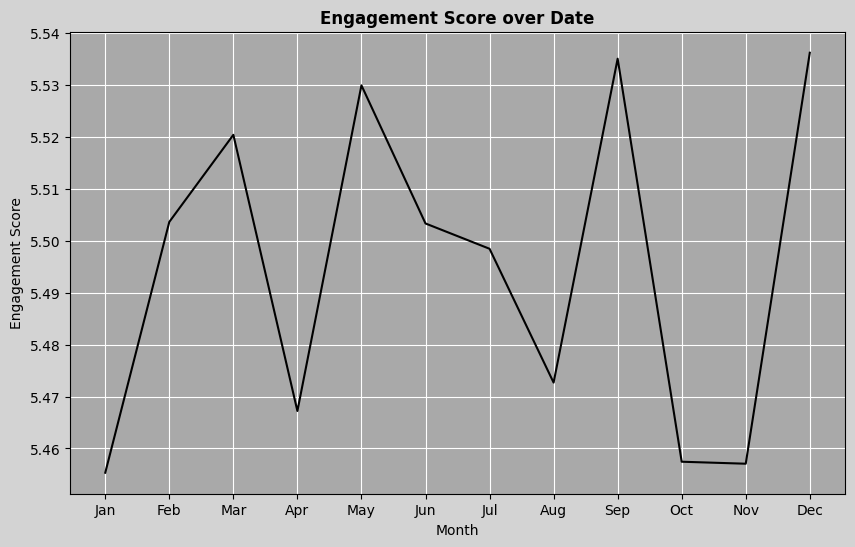

In [36]:
eng_sc = df.groupby(df['date'].dt.strftime('%b')).agg({'engagement_score' : 'mean'}).reset_index()

eng_sc['date'] = pd.Categorical(eng_sc['date'], categories=list(calendar.month_abbr), ordered=True)

plt.figure(figsize=(10, 6), facecolor='lightgrey')

sns.lineplot(x='date', y='engagement_score', data=eng_sc, color='black')

plt.gca().set_facecolor('darkgrey')

plt.title('Engagement Score over Date', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Engagement Score')
plt.grid(True, color='white')

plt.show()



*   Jan, Oct and Nov has the lowest engagement score. Suggesting it's the most challenging month for engagement.
*   The most significant increases occur between Nov and Dec. However, the conversion rate has been volatile throughout the year.



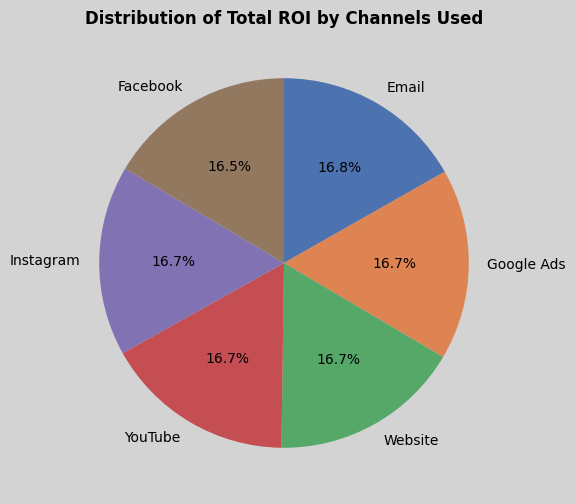

In [37]:
pie = df.groupby(by='channel_used')['roi'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6), facecolor='lightgrey')

color = sns.color_palette('deep', len(pie))

plt.pie(pie, labels=pie.index, autopct='%1.1f%%', colors=color, startangle=90, counterclock=False)

plt.title('Distribution of Total ROI by Channels Used', fontweight='bold')

plt.show()



*   The ROI is relatively evenly distributed across all channels, with percentages ranging from 16.0% to 17%. This suggests a balanced marketing strategy where no single channel dominates.
*   Combined, social media channels (Facebook, Instagram, YouTube) account for 49.9% of total ROI, highlighting good adaptation to modern marketing trends.
*   The company's website contributes 16.7% to the total ROI, suggesting it's an important part of the overall strategy.
*   With 16.8% ROI, email remains a valuable channel despite the rise of social media.





**Channel Effectivenes Conclusion:**

*   ROI is evenly distributed across channels, with social media accounting for nearly 50% of total ROI. In this era of social media, email campaigns still present strong competition to social media platforms.




# **Time-Base Analysis:**

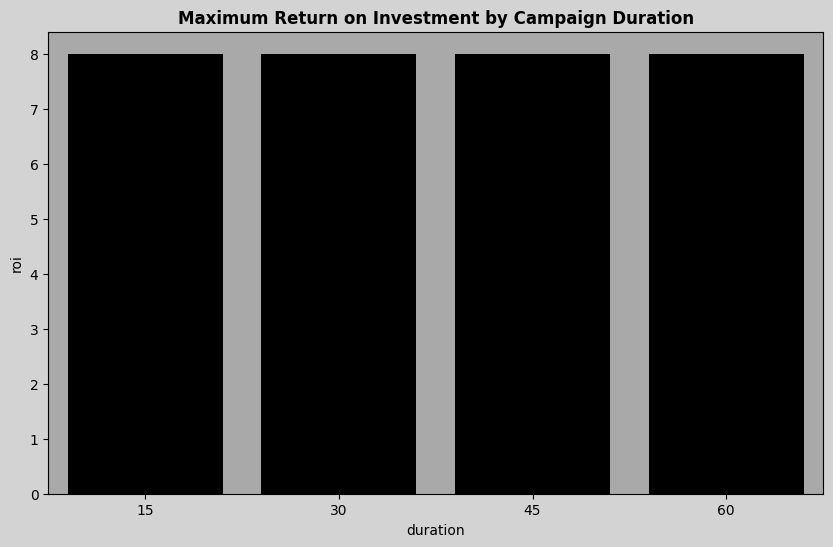

In [38]:
plt.figure(figsize=(10, 6), facecolor='lightgrey')

order_D_ROI = df.duration.sort_values()

sns.barplot(x='duration', y='roi', data=df, estimator='max', order=order_D_ROI, errorbar=None, color='blacK')

plt.gca().set_facecolor('darkgrey')

plt.title('Maximum Return on Investment by Campaign Duration', fontweight='bold')

plt.show()

The Return on Investment looks constant over all campaign durations.

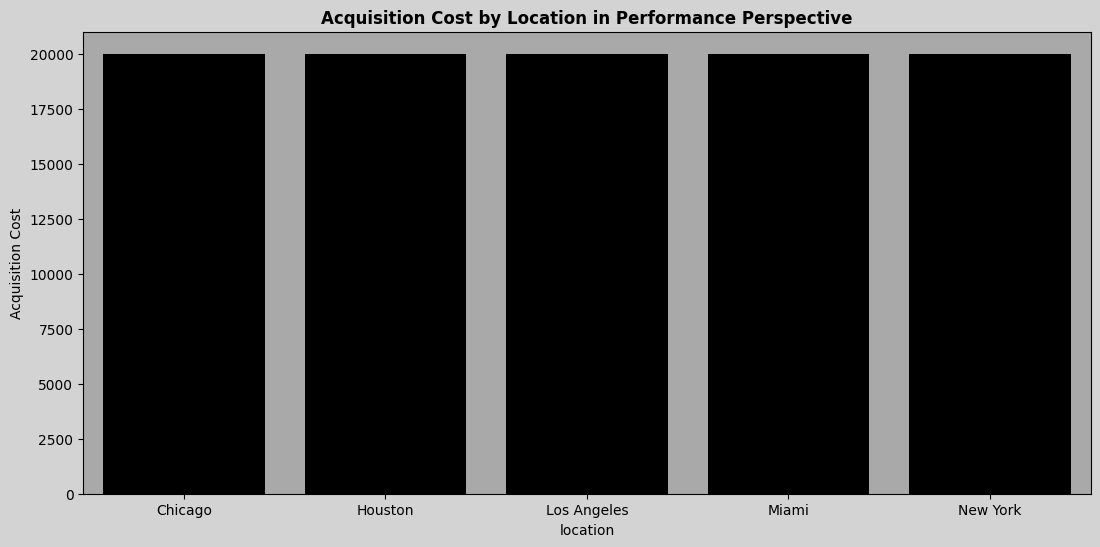

In [39]:
loc_ord_AC = df.groupby(by='location')['acquisition_cost'].max().sort_values(ascending=False).index

plt.figure(figsize=(13, 6), facecolor='lightgrey')

sns.barplot(x='location', y='acquisition_cost', data=df, estimator='max', order=loc_ord_AC, errorbar=None, color='black')

plt.gca().set_facecolor('darkgrey')

plt.title('Acquisition Cost by Location in Performance Perspective', fontweight='bold')
plt.ylabel('Acquisition Cost')

plt.show()



*   There is no significant difference between the locations.
*   Same acquisition costs across locations can be beneficial if it results from resource allocation or standardization, but it may also suggest that the campaign is not optimizing for local market differences. It’s important to ensure that acquisition strategies are flexible enough to respond to location-specific factors to maximize efficiency and ROI.



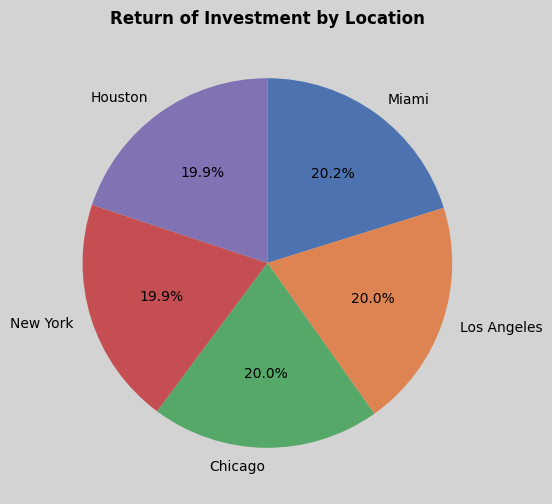

In [40]:
roi_pie = df.groupby('location')['roi'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6), facecolor='lightgrey')

color = sns.color_palette('deep', len(pie))

plt.pie(roi_pie, labels=roi_pie.index, autopct='%1.1f%%', colors=color, startangle=90, counterclock=False)

plt.gca().set_facecolor('darkgrey')

plt.title('Return of Investment by Location', fontweight='bold')

plt.show()

Its clearly visible that all location contributes equally with respect to ROI.

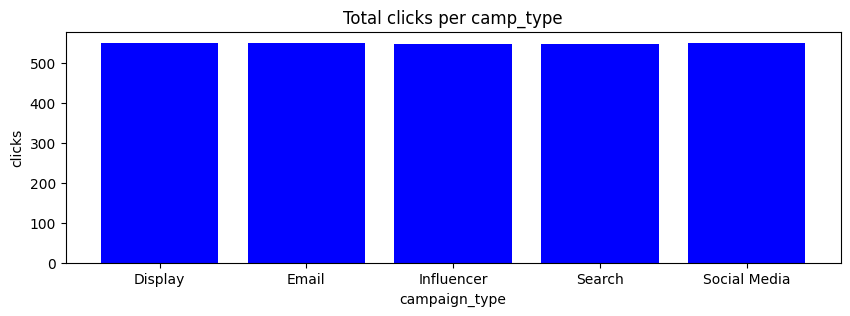

In [41]:
df_grouped = df.groupby("campaign_type")[["clicks"]].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 3))
plt.bar(df_grouped["campaign_type"], df_grouped["clicks"], color='b')
plt.xlabel("campaign_type")
plt.ylabel("clicks")
plt.title("Total clicks per camp_type")
plt.show()

In [42]:
# Creating new metrics

df['ctr'] = (df['clicks'] / df['impressions']) * 100
df['cpc'] = df['acquisition_cost'] / df['clicks']
df['cpm'] = (df['acquisition_cost'] / df['impressions']) * 1000

In [43]:
df.head(5)

,campaign_id,company,campaign_type,target_audience,duration,channel_used,conversion_rate,acquisition_cost,roi,location,language,clicks,impressions,engagement_score,customer_segment,date,ctr,cpc,cpm
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,26.326743,31.964427,8415.192508
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,1.541938,99.706897,1537.418583
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,7.586386,17.465753,1325.019486
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,11.923077,58.635945,6991.208791
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,9.021662,43.408971,3916.210426


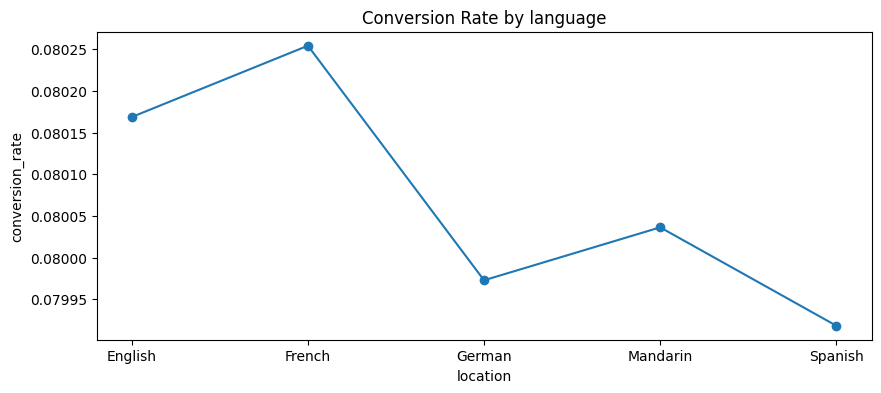

In [44]:
df_grouped = df.groupby("language")[["conversion_rate"]].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(df_grouped['language'], df_grouped['conversion_rate'], marker='o')
plt.xlabel('location')
plt.ylabel('conversion_rate')
plt.title('Conversion Rate by language')
plt.show()

Average conversion rate is highest for "French" and lowest for "Spanish".

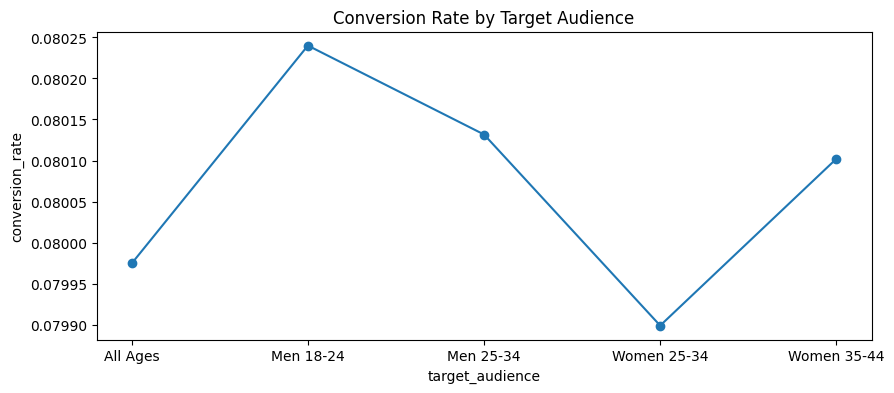

In [45]:
df_grouped = df.groupby("target_audience")[["conversion_rate"]].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(df_grouped['target_audience'], df_grouped['conversion_rate'], marker='o')
plt.xlabel('target_audience')
plt.ylabel('conversion_rate')
plt.title('Conversion Rate by Target Audience')
plt.show()

All audiences shows equal potential conversion rate, but looking at the graph we can clearly say that Men audience segment has a higher conversion rate than that of women.

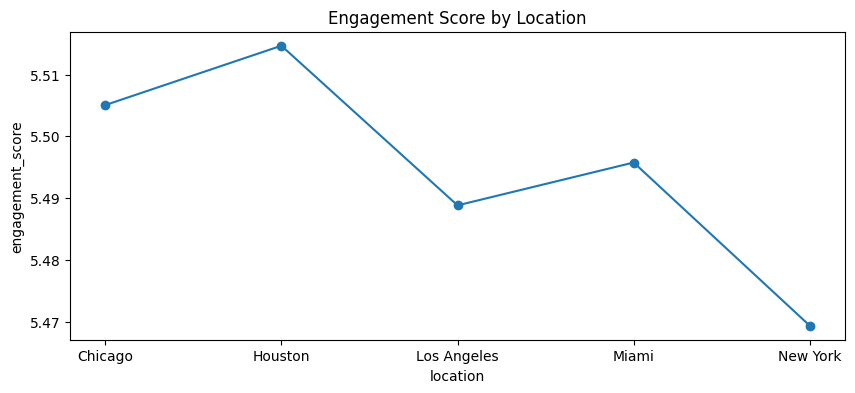

In [46]:
df_grouped = df.groupby("location")[["engagement_score"]].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(df_grouped['location'], df_grouped['engagement_score'], marker='o')
plt.xlabel('location')
plt.ylabel('engagement_score')
plt.title('Engagement Score by Location')
plt.show()

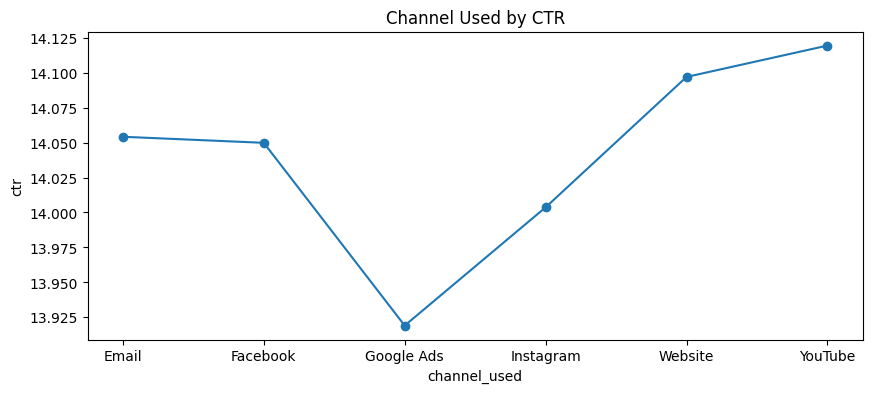

In [47]:
df_grouped = df.groupby("channel_used")[["ctr"]].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(df_grouped['channel_used'], df_grouped['ctr'], marker='o')
plt.xlabel('channel_used')
plt.ylabel('ctr')
plt.title('Channel Used by CTR')
plt.show()

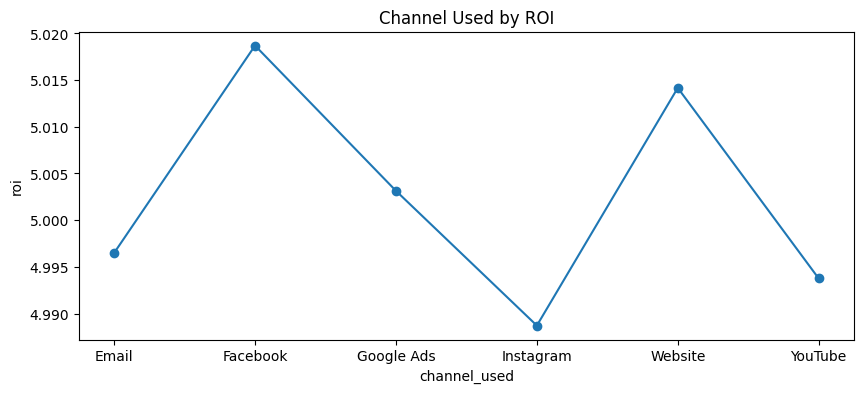

In [48]:
df_grouped = df.groupby("channel_used")[["roi"]].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(df_grouped['channel_used'], df_grouped['roi'], marker='o')
plt.xlabel('channel_used')
plt.ylabel('roi')
plt.title('Channel Used by ROI')
plt.show()

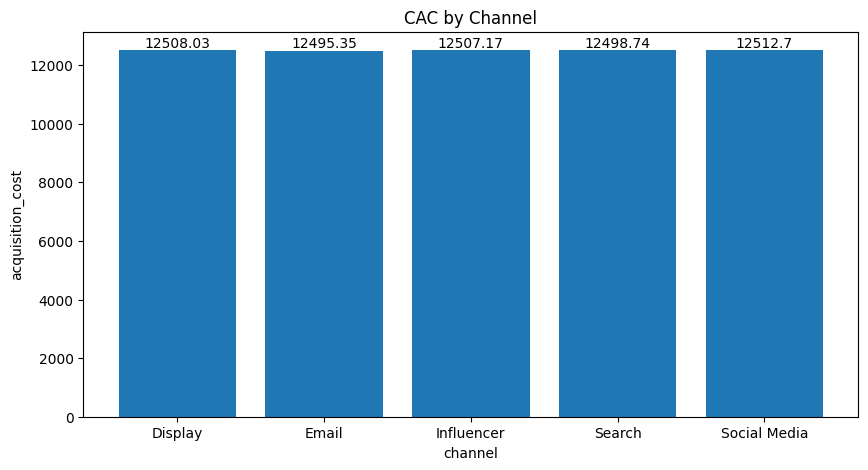

In [49]:
avg_cac = df.groupby("campaign_type")[["acquisition_cost"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(avg_cac['campaign_type'], avg_cac['acquisition_cost'])
plt.xlabel('channel')
plt.ylabel('acquisition_cost')
plt.title('CAC by Channel')

for i, v in enumerate(avg_cac['acquisition_cost']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

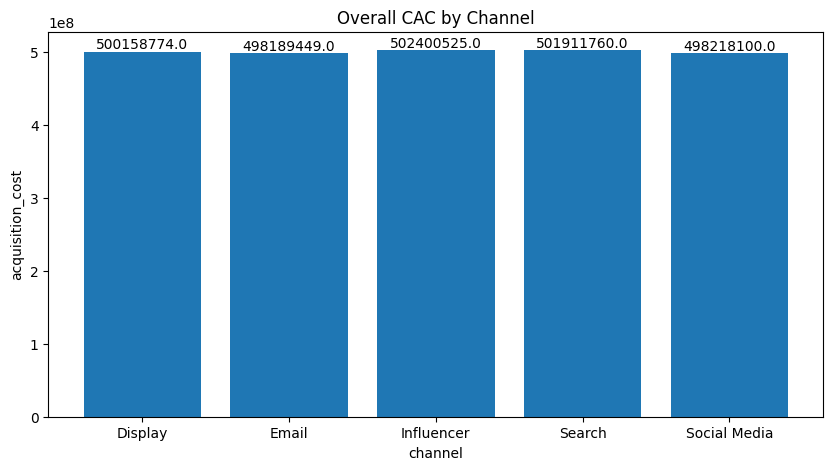

In [50]:
total_cac = df.groupby("campaign_type")[["acquisition_cost"]].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(total_cac['campaign_type'], total_cac['acquisition_cost'])
plt.xlabel('channel')
plt.ylabel('acquisition_cost')
plt.title('Overall CAC by Channel')

for i, v in enumerate(total_cac['acquisition_cost']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

In [52]:
num = df.groupby("campaign_type")[["acquisition_cost"]].sum().reset_index()
print(num)

  campaign_type  acquisition_cost
0       Display       500158774.0
1         Email       498189449.0
2    Influencer       502400525.0
3        Search       501911760.0
4  Social Media       498218100.0


In [51]:
numu = df.groupby("campaign_type")[["acquisition_cost"]].mean().round(2).reset_index()
print(numu)

  campaign_type  acquisition_cost
0       Display          12508.03
1         Email          12495.35
2    Influencer          12507.17
3        Search          12498.74
4  Social Media          12512.70


# **Recommendations**

Refine Targeting:
* Focus on improving targeting strategies to reduce acquisition costs, especially for segments with higher ROI. Additionally, consider extending the duration of campaigns to maximize returns, especially in months showing high engagement but lower conversion rates (April and July), allowing more time to nurture potential leads into customers.

Enhance Localization:
* Continue successful localization efforts for non-English-speaking markets while refining content to improve conversion efficiency across all languages.

Focus on High-Impact Channels:
* Social media, especially influencer marketing, should remain a priority due to its high engagement and ROI, but don’t neglect email, which offers consistent returns with lower acquisition costs.

This analysis provides a clear pathway to optimize marketing efforts across channels, audiences, and geographies, helping the company drive greater ROI and sustained growth.